# Car price assignment

## 1. Data understanding and preparation
---

In [446]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score
import itertools  

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

In [447]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [448]:
# let's check the null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [449]:
df.isna().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [450]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Visualize the data

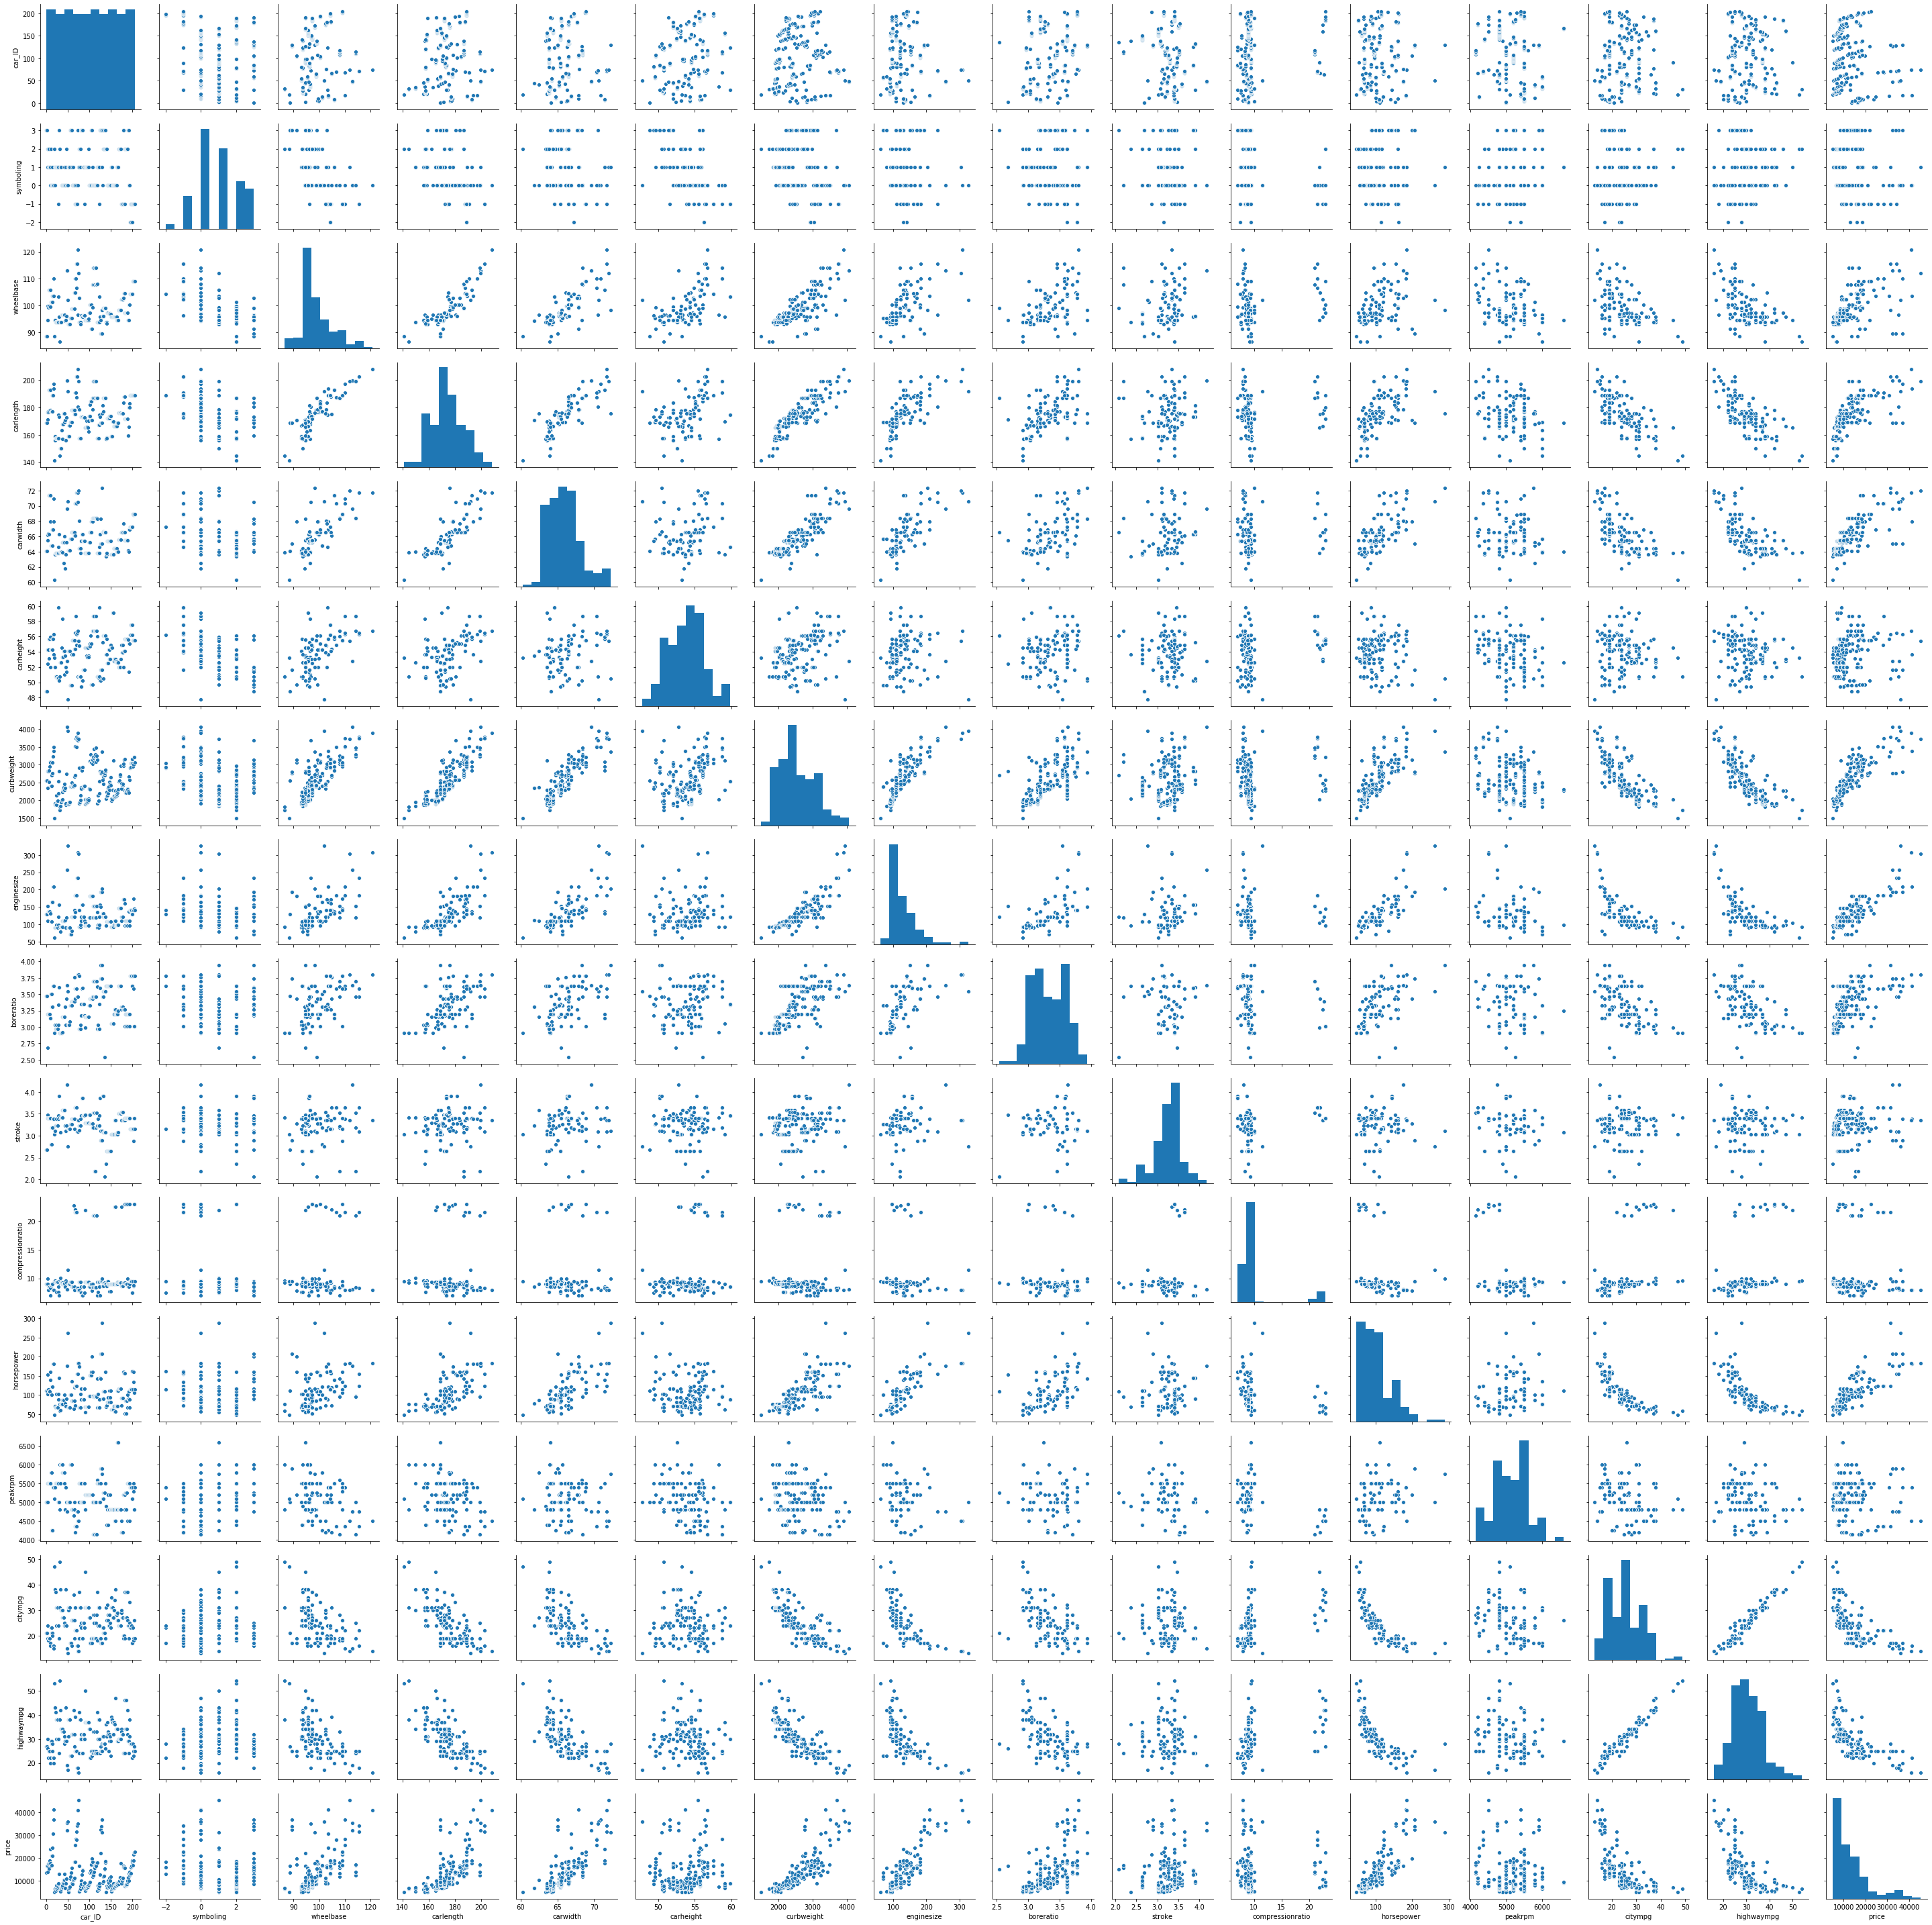

In [451]:
sns.pairplot(df)
plt.show()

From the above plots, we can see that price (last row) is linearly related to many variables. So it make sense to do a linear regression model.

In [452]:
# Instead of car name, we need car company.
df['CarName'] = df['CarName'].apply(lambda x: x.split(" ", 1)[0])

In [453]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [454]:
# Let's first change the column name
df.rename(columns={'CarName' : 'carcompany'}, inplace=True)
#df

In [455]:
# Let's correct the mistakes in the names.
#-nissan/Nissan, mazda/maxda, porsche/porcshe, toyota/toyouta, vokswagen/volkswagen/vw
df['carcompany'] = df['carcompany'].str.lower() 
df.carcompany.replace({'maxda':'mazda', 
                       'porcshe' : 'porsche',
                       'porcshce' : 'porsche',
                       'toyouta' : 'toyota',
                       'vokswagen': 'volkswagen',
                       'vw' : 'volkswagen'}, inplace=True)
df['carcompany'].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [456]:
df.head(15)

,car_ID,symboling,carcompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


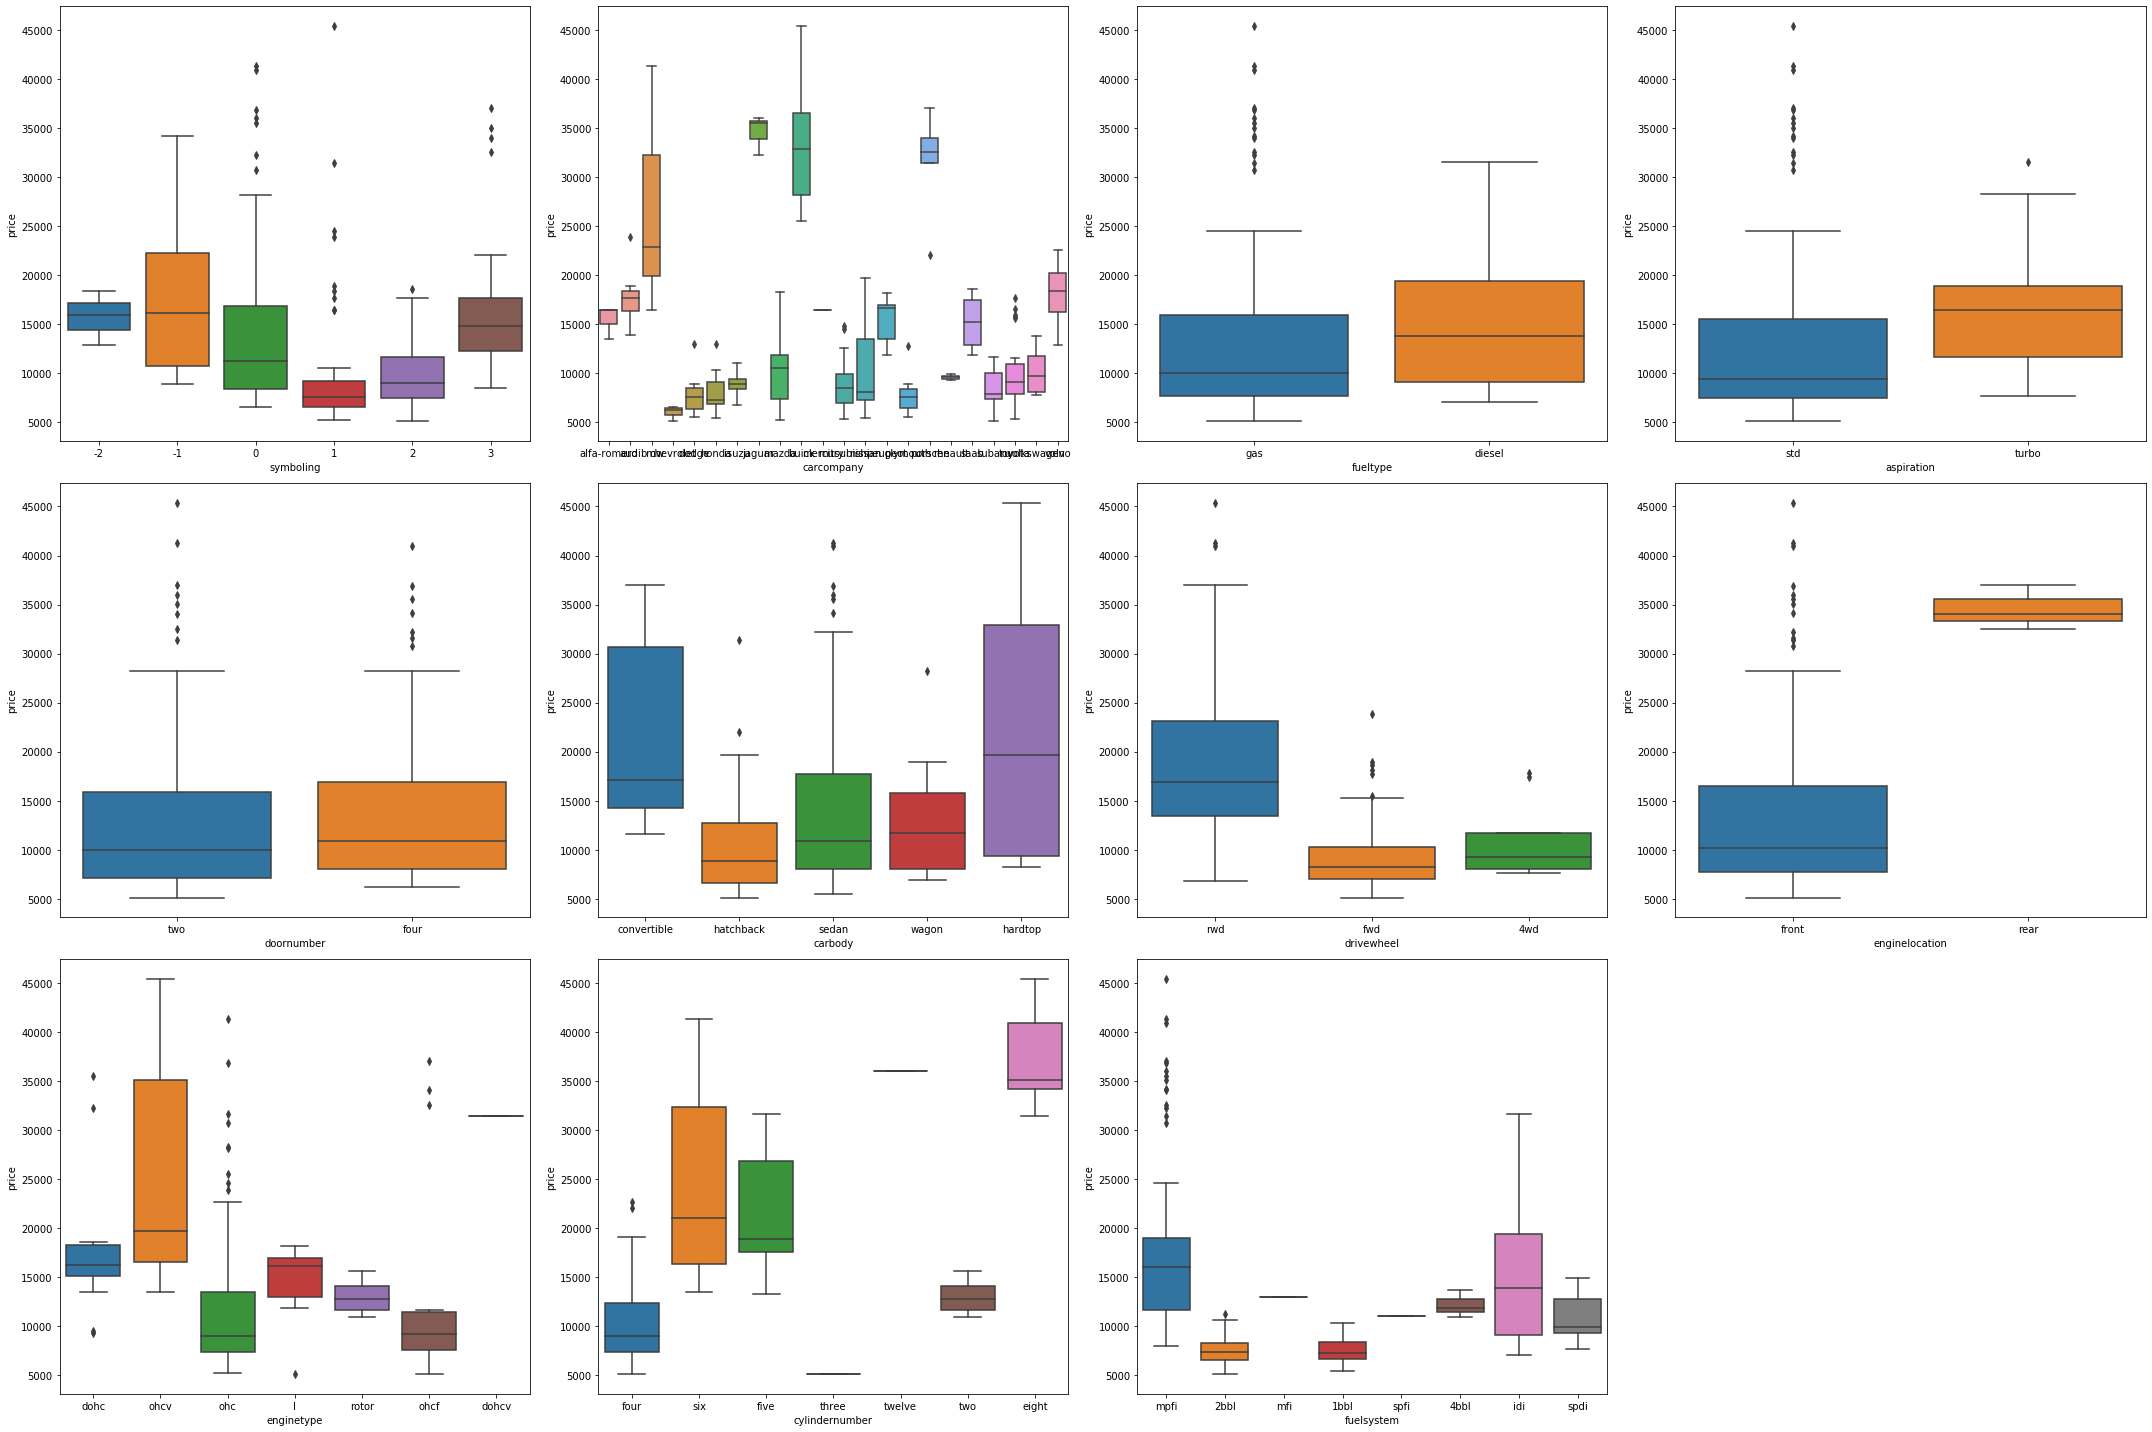

In [457]:
# it's time to plot
plt.figure(figsize=(30, 20))

plt.subplot(3,4,1)
sns.boxplot(x = 'symboling', y = 'price', data = df)
plt.subplot(3,4,2)
sns.boxplot(x = 'carcompany', y = 'price', data = df)
plt.subplot(3,4,3)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,4,4)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,4,5)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,4,6)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,4,7)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,4,8)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,4,9)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,4,10)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(3,4,11)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)

plt.tight_layout()
plt.show()

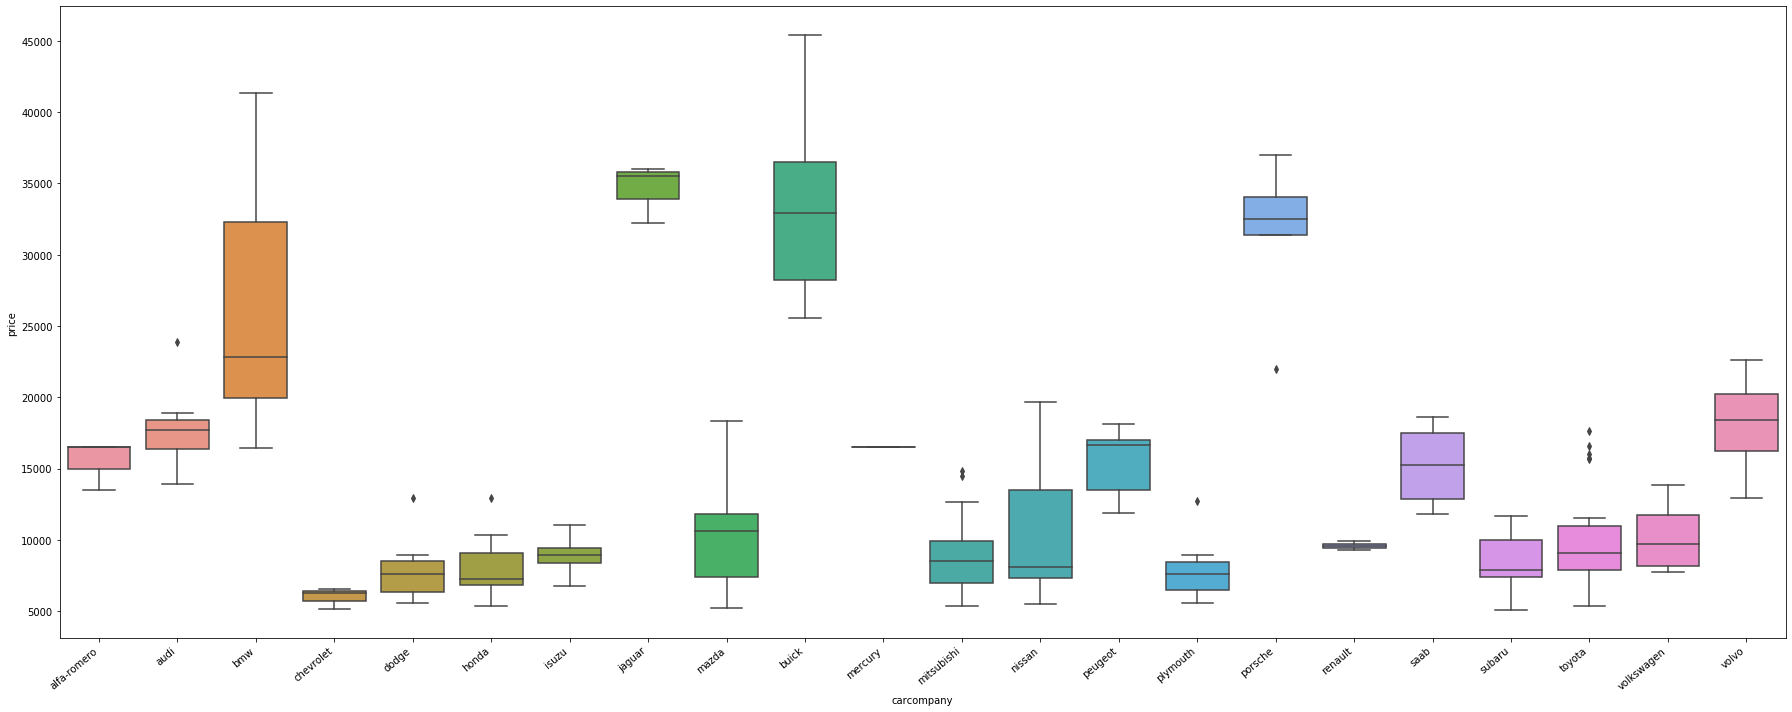

In [458]:
plt.figure(figsize=(25, 10))
ax = sns.boxplot(x="carcompany", y='price', data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Many categories such as fueltype, aspiration, enginelocation seem to have linear relationship with the price. Also, we can see there are many segments in the carcompany category. For instance, Jaguar, Buick and Porsche cars seem to belong to expensive/luxuary category whereas alfa-romero belongs to mid-range segment and brands such as chevrolet, dodge, honda, toyota nissan belong to low-priced segment.

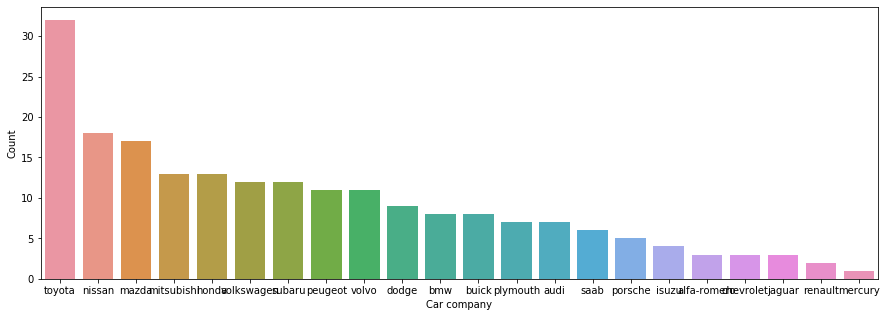

<Figure size 432x288 with 0 Axes>

In [459]:
# Let's check which brand is popular
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(df['carcompany'], order=pd.value_counts(df['carcompany']).index)
plt1.set(xlabel = 'Car company', ylabel= 'Count')
plt.show()
plt.tight_layout()

From the chart, it is clear that Toyota is the most popular brand.

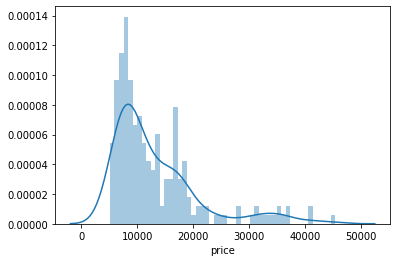

In [460]:
# Let's check the distribution of price
sns.distplot(df.price, bins= 50)
plt.show()

(16.0, 0.0)

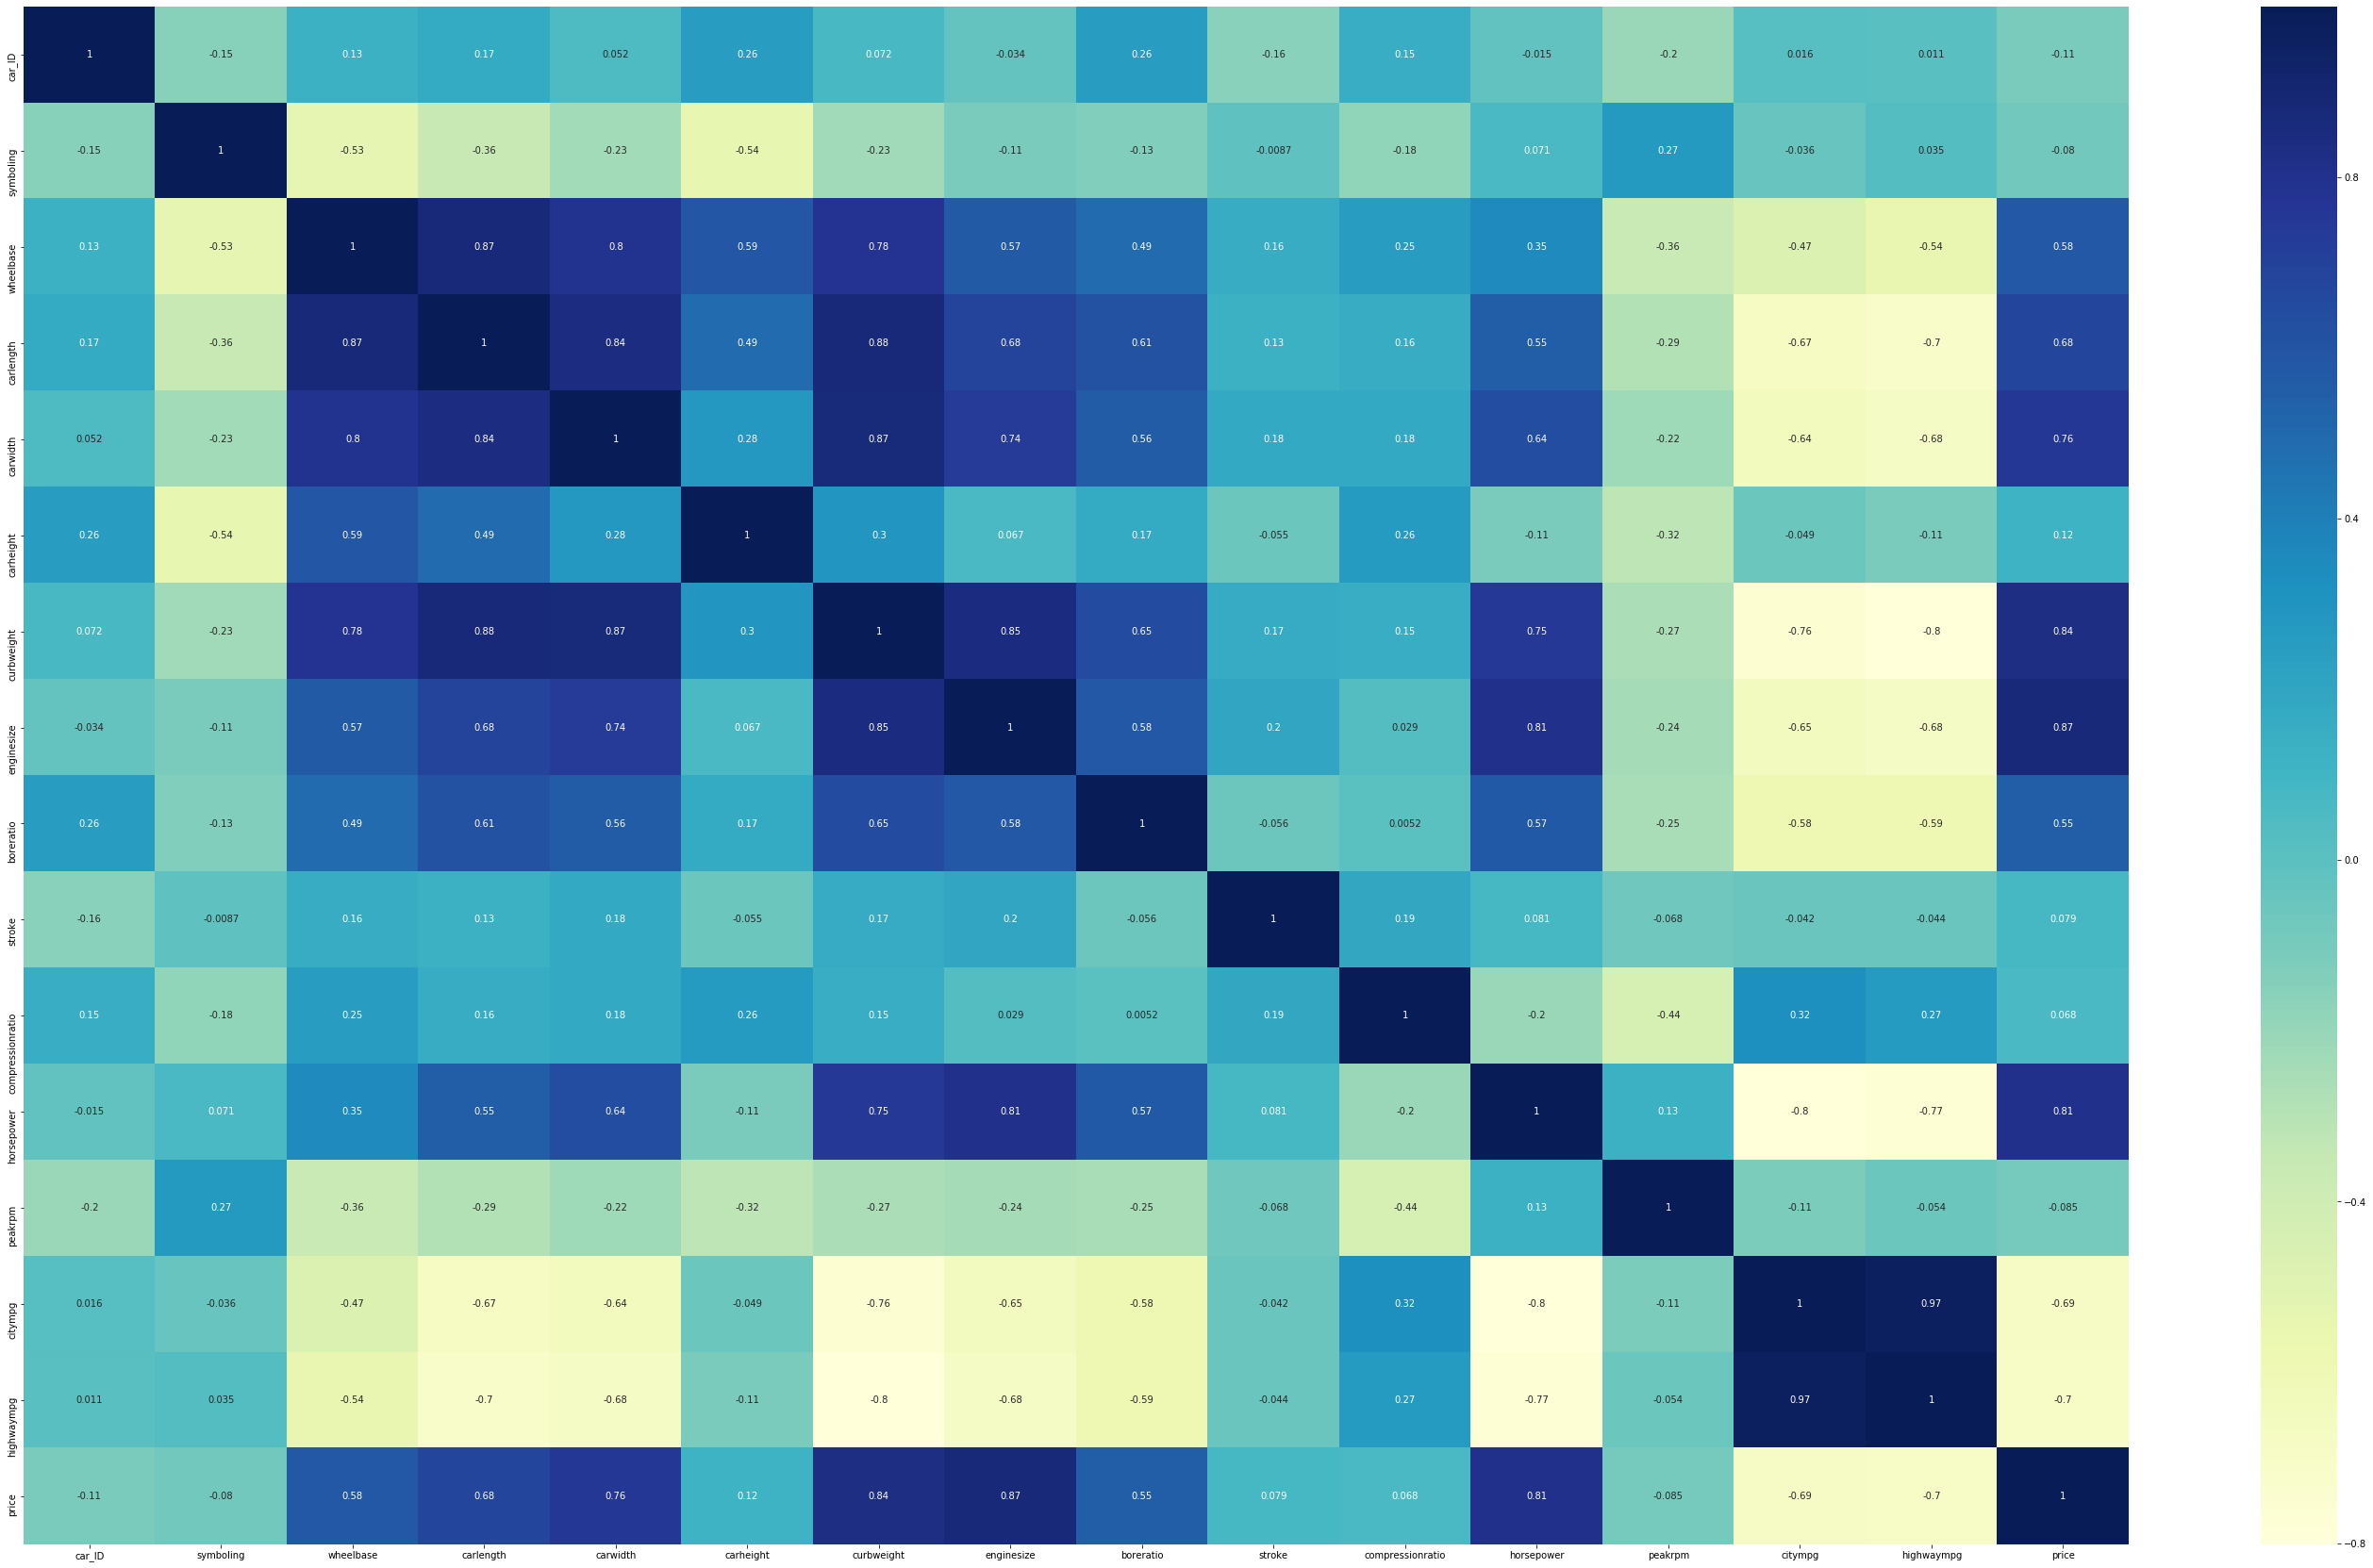

In [461]:
# Let's take a look into the correlation matrix
#plt.figure(figsize=(200,200))
plt.figure(figsize=(50, 30))
ax = sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

From the above heatmap, we can see price has high correlation with many variables such as enginesize, curbweight etc.

### Handling categorical variables

In [462]:
# Let's have a method to do common steps
def addDummyVariables(df, category):
    dummy = pd.get_dummies(df[category], drop_first = True)
    # Let's add the dummy variables to our main df
    df = pd.concat([df, dummy], axis = 1)

    # we don't need the actual column any more, so let's delete
    df.drop(category, axis = 1, inplace = True) 
    return df

##### Symboling

Symboling is an ordered categorical variable. The order is -3, -2, -1, 0 , 1, 2, 3. As it's ordinal, we don't have to create dummy variables. Also, it's already in a numeric order. So I think we can let that column be as it is. As far as I understand, mapping the values 0-6 and -3 to 3 have similar effect on the model.

In [463]:
# Let's create the list of categorical variables to be converted to dummy variables.
cat_list = ['carcompany', 'doornumber', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']

# Call the function for each category
for cat in cat_list:
    df = addDummyVariables(df, cat)
df

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,two,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,four,141,3.78,3.15,9.5,114,5400,23,28,16845.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
201,202,-1,109.1,188.8,68.8,55.5,3049,four,141,3.78,3.15,8.7,160,5300,19,25,19045.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
202,203,-1,109.1,188.8,68.9,55.5,3012,six,173,3.58,2.87,8.8,134,5500,18,23,21485.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
203,204,-1,109.1,188.8,68.9,55.5,3217,six,145,3.01,3.40,23.0,106,4800,26,27,22470.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [464]:
# Renaming the doornumber dummy column from 'two' to 'two_door'.
df.rename(columns={"two": "two_door"}, inplace=True)

In [465]:
df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [466]:
# Converting the ordered categorical column into numeric
df['cylindernumber'] = df['cylindernumber'].map({"two": '2', "three" : '3', "four": '4', "five" : '5', "six" : '6', "eight" : '8', "twelve" : "12"})
df

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,two_door,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114,5400,23,28,16845.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
201,202,-1,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160,5300,19,25,19045.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
202,203,-1,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134,5500,18,23,21485.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
203,204,-1,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106,4800,26,27,22470.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [467]:
df.dtypes

car_ID                int64
symboling             int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
cylindernumber       object
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
audi                  uint8
bmw                   uint8
buick                 uint8
chevrolet             uint8
dodge                 uint8
honda                 uint8
isuzu                 uint8
jaguar                uint8
mazda                 uint8
mercury               uint8
mitsubishi            uint8
nissan                uint8
peugeot               uint8
plymouth              uint8
porsche               uint8
renault               uint8
saab                  uint8
subaru                uint8
toyota              

In [468]:
# Let's convert cylindernumber to integer
df['cylindernumber'] = pd.to_numeric(df['cylindernumber'])

In [469]:
# car_ID columns is not required
df.drop('car_ID', axis=1, inplace=True)

### Splitting the data into train-test

In [470]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [471]:
print(df_train.shape)
print(df_test.shape)

(143, 60)
(62, 60)


### Scaling the numeric variables

In [472]:
scaler = MinMaxScaler()

In [473]:
# Apply scaler() to all the columns except 'dummy' variables and categorical variables
num_vars = ['wheelbase',
            'carlength', 
            'carwidth', 
            'carheight',
            'curbweight', 
            'enginesize', 
            'boreratio',
            'stroke',
            'compressionratio', 
            'horsepower',
            'peakrpm',
            'citympg',
            'highwaympg', 
            'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

D:\Programs\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Programs\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Dividing into X and Y sets for the model building

In [474]:
y_train = df_train.pop('price')
X_train = df_train

## 2. Building the model
---

### RFE

In [475]:
# Let's build the first model using RFE

lr_rfe = LinearRegression()
lr_rfe.fit(X_train, y_train)

rfe = RFE(lr_rfe, 15)
rfe = rfe.fit(X_train, y_train)

In [476]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 42),
 ('wheelbase', False, 2),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 12),
 ('curbweight', True, 1),
 ('cylindernumber', False, 20),
 ('enginesize', True, 1),
 ('boreratio', False, 9),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 15),
 ('peakrpm', False, 11),
 ('citympg', False, 10),
 ('highwaympg', False, 26),
 ('audi', False, 28),
 ('bmw', True, 1),
 ('buick', False, 35),
 ('chevrolet', False, 22),
 ('dodge', False, 18),
 ('honda', False, 23),
 ('isuzu', False, 30),
 ('jaguar', False, 24),
 ('mazda', False, 32),
 ('mercury', False, 43),
 ('mitsubishi', False, 13),
 ('nissan', False, 29),
 ('peugeot', True, 1),
 ('plymouth', False, 19),
 ('porsche', False, 3),
 ('renault', False, 25),
 ('saab', False, 8),
 ('subaru', True, 1),
 ('toyota', False, 31),
 ('volkswagen', False, 27),
 ('volvo', False, 40),
 ('two_door', False, 38),
 ('gas', True, 1),
 ('turbo', False, 16),
 ('hardtop', False, 6),
 ('hatchb

In [477]:
col = X_train.columns[rfe.support_]
col

Index(['carlength', 'carwidth', 'curbweight', 'enginesize', 'stroke', 'compressionratio', 'bmw',
       'peugeot', 'subaru', 'gas', 'rear', 'l', 'ohcf', 'rotor', 'idi'],
      dtype='object')

In [478]:
X_train.columns[~rfe.support_]

Index(['symboling', 'wheelbase', 'carheight', 'cylindernumber', 'boreratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'audi', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'plymouth', 'porsche', 'renault',
       'saab', 'toyota', 'volkswagen', 'volvo', 'two_door', 'turbo', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'ohc', 'ohcv', '2bbl', '4bbl', 'mfi', 'mpfi',
       'spdi', 'spfi'],
      dtype='object')

In [479]:
# Creating X_test1 dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe

,carlength,carwidth,curbweight,enginesize,stroke,compressionratio,bmw,peugeot,subaru,gas,rear,l,ohcf,rotor,idi
122,0.426016,0.291667,0.272692,0.139623,0.525253,0.15000,0,0,0,1,0,0,0,0,0
125,0.452033,0.666667,0.500388,0.339623,0.464646,0.15625,0,0,0,1,0,0,0,0,0
166,0.448780,0.308333,0.314973,0.139623,0.449495,0.15000,0,0,0,1,0,0,0,0,0
1,0.450407,0.316667,0.411171,0.260377,0.247475,0.12500,0,0,0,1,0,0,0,0,0
199,0.775610,0.575000,0.647401,0.260377,0.484848,0.03125,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.508943,0.425000,0.354926,0.184906,0.641414,0.03125,0,0,0,1,0,0,0,0,0
103,0.707317,0.516667,0.609775,0.452830,0.545455,0.12500,0,0,0,1,0,0,0,0,0
67,0.809756,0.833333,0.786268,0.460377,0.732323,0.90625,0,0,0,0,0,0,0,0,1
24,0.263415,0.291667,0.185803,0.109434,0.525253,0.15000,0,0,0,1,0,0,0,0,0


### Model #1

In [480]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train, X_train_rfe_sm).fit()
lm1.summary()

D:\Programs\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     129.9
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.15e-67
Time:                        22:56:29   Log-Likelihood:                 206.10
No. Observations:                 143   AIC:                            -384.2
Df Residuals:                     129   BIC:                            -342.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0348      0.071      0.488      0.627      -0.106       0.176
carlength           -0.1983      0.062     -3.183      0.002      -0.322      -0.075
carwidth             0.4709      0.063      7.468      0.000       0.346       0.596
curbweight           0.4339      0.098      4.421      0.000       0.240       0.628
enginesize           0.4057      0.096      4.212      0.000       0.215       0.596
stroke              -0.1777      0.051     -3.517      0.001      -0.278      -0.078
compressionratio    -0.2105      0.160     -1.316      0.190      -0.527       0.106
bmw                  0.2441      0.028      8.766      0.000       0.189       0.299
peugeot             -0.3034      0.070     -4.349      0.000      -0.441      -0.165
subaru              -0.2062      0.026     -7.952      0.000      -0.258      -0.155
gas                 -0.0907      0.036     -2.507      0.013      -0.162      -0.019
rear                 0.3228      0.043      7.539      0.000       0.238       0.408
l                    0.1652      0.063      2.633      0.010       0.041       0.289
ohcf                 0.1166      0.024      4.851      0.000       0.069       0.164
rotor                0.1065      0.037      2.895      0.004       0.034       0.179
idi                  0.1255      0.104      1.201      0.232      -0.081       0.332
==============================================================================
Omnibus:                       19.971   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.102
Skew:                           0.565   Prob(JB):                     2.65e-10
Kurtosis:                       5.475   Cond. No.                     6.25e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.07e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Model #2

In [481]:
# Removing the variable with highest p-value, idi

X_train_rfe = X_train_rfe.drop('idi', axis = 1)

X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train, X_train_rfe_sm).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     129.9
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.15e-67
Time:                        22:56:29   Log-Likelihood:                 206.10
No. Observations:                 143   AIC:                            -384.2
Df Residuals:                     129   BIC:                            -342.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1602      0.175      0.915      0.362      -0.186       0.507
carlength           -0.1983      0.062     -3.183      0.002      -0.322      -0.075
carwidth             0.4709      0.063      7.468      0.000       0.346       0.596
curbweight           0.4339      0.098      4.421      0.000       0.240       0.628
enginesize           0.4057      0.096      4.212      0.000       0.215       0.596
stroke              -0.1777      0.051     -3.517      0.001      -0.278      -0.078
compressionratio    -0.2105      0.160     -1.316      0.190      -0.527       0.106
bmw                  0.2441      0.028      8.766      0.000       0.189       0.299
peugeot             -0.3034      0.070     -4.349      0.000      -0.441      -0.165
subaru              -0.2062      0.026     -7.952      0.000      -0.258      -0.155
gas                 -0.2162      0.139     -1.554      0.123      -0.491       0.059
rear                 0.3228      0.043      7.539      0.000       0.238       0.408
l                    0.1652      0.063      2.633      0.010       0.041       0.289
ohcf                 0.1166      0.024      4.851      0.000       0.069       0.164
rotor                0.1065      0.037      2.895      0.004       0.034       0.179
==============================================================================
Omnibus:                       19.971   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.102
Skew:                           0.565   Prob(JB):                     2.65e-10
Kurtosis:                       5.475   Cond. No.                     6.38e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.03e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Model #3

In [482]:
# Removing the variable with highest p-value, compressionratio

X_train_rfe = X_train_rfe.drop('compressionratio', axis = 1)

X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train, X_train_rfe_sm).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     139.8
Date:                Sun, 31 May 2020   Prob (F-statistic):           4.18e-68
Time:                        22:56:29   Log-Likelihood:                 205.14
No. Observations:                 143   AIC:                            -384.3
Df Residuals:                     130   BIC:                            -345.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0646      0.039     -1.678      0.096      -0.141       0.012
carlength     -0.2163      0.061     -3.549      0.001      -0.337      -0.096
carwidth       0.4697      0.063      7.429      0.000       0.345       0.595
curbweight     0.4906      0.088      5.548      0.000       0.316       0.666
enginesize     0.3544      0.088      4.012      0.000       0.180       0.529
stroke        -0.1442      0.044     -3.295      0.001      -0.231      -0.058
bmw            0.2514      0.027      9.183      0.000       0.197       0.306
peugeot       -0.2903      0.069     -4.193      0.000      -0.427      -0.153
subaru        -0.2000      0.026     -7.822      0.000      -0.251      -0.149
gas           -0.0350      0.020     -1.720      0.088      -0.075       0.005
rear           0.3224      0.043      7.507      0.000       0.237       0.407
l              0.1618      0.063      2.574      0.011       0.037       0.286
ohcf           0.1223      0.024      5.161      0.000       0.075       0.169
rotor          0.0912      0.035      2.606      0.010       0.022       0.160
==============================================================================
Omnibus:                       20.978   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.160
Skew:                           0.574   Prob(JB):                     2.11e-11
Kurtosis:                       5.633   Cond. No.                     3.77e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.91e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Model #4

In [483]:
# Removing the variable with highest p-value, gas

X_train_rfe = X_train_rfe.drop('gas', axis = 1)

X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train, X_train_rfe_sm).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     150.0
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.43e-68
Time:                        22:56:29   Log-Likelihood:                 203.53
No. Observations:                 143   AIC:                            -383.1
Df Residuals:                     131   BIC:                            -347.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1122      0.027     -4.159      0.000      -0.166      -0.059
carlength     -0.2231      0.061     -3.641      0.000      -0.344      -0.102
carwidth       0.4790      0.063      7.547      0.000       0.353       0.605
curbweight     0.5148      0.088      5.852      0.000       0.341       0.689
enginesize     0.3265      0.087      3.732      0.000       0.153       0.500
stroke        -0.1235      0.042     -2.913      0.004      -0.207      -0.040
bmw            0.2509      0.028      9.098      0.000       0.196       0.305
peugeot       -0.2839      0.070     -4.076      0.000      -0.422      -0.146
subaru        -0.1992      0.026     -7.732      0.000      -0.250      -0.148
rear           0.3253      0.043      7.524      0.000       0.240       0.411
l              0.1655      0.063      2.615      0.010       0.040       0.291
ohcf           0.1261      0.024      5.303      0.000       0.079       0.173
rotor          0.0841      0.035      2.401      0.018       0.015       0.153
==============================================================================
Omnibus:                       17.755   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.992
Skew:                           0.493   Prob(JB):                     3.41e-09
Kurtosis:                       5.361   Cond. No.                     3.20e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.9e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [484]:
# All the p-values are in the permissible range. So let's check the VIF values.

def printVIF(df):
    vif = pd.DataFrame()
    X = df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
          
printVIF(X_train_rfe)          

      Features    VIF
7       subaru    inf
8         rear    inf
10        ohcf    inf
2   curbweight  61.64
0    carlength  42.65
1     carwidth  37.39
3   enginesize  24.11
6      peugeot  10.05
9            l   9.31
4       stroke   8.47
11       rotor   1.32
5          bmw   1.22


D:\Programs\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


### Model #5

In [485]:
# Removing the variable with highest VIF, subaru

X_train_rfe = X_train_rfe.drop('subaru', axis = 1)

X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train, X_train_rfe_sm).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     150.0
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.43e-68
Time:                        22:56:29   Log-Likelihood:                 203.53
No. Observations:                 143   AIC:                            -383.1
Df Residuals:                     131   BIC:                            -347.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1122      0.027     -4.159      0.000      -0.166      -0.059
carlength     -0.2231      0.061     -3.641      0.000      -0.344      -0.102
carwidth       0.4790      0.063      7.547      0.000       0.353       0.605
curbweight     0.5148      0.088      5.852      0.000       0.341       0.689
enginesize     0.3265      0.087      3.732      0.000       0.153       0.500
stroke        -0.1235      0.042     -2.913      0.004      -0.207      -0.040
bmw            0.2509      0.028      9.098      0.000       0.196       0.305
peugeot       -0.2839      0.070     -4.076      0.000      -0.422      -0.146
rear           0.5244      0.067      7.819      0.000       0.392       0.657
l              0.1655      0.063      2.615      0.010       0.040       0.291
ohcf          -0.0731      0.024     -3.012      0.003      -0.121      -0.025
rotor          0.0841      0.035      2.401      0.018       0.015       0.153
==============================================================================
Omnibus:                       17.755   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.992
Skew:                           0.493   Prob(JB):                     3.41e-09
Kurtosis:                       5.361   Cond. No.                         34.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [486]:
# All the p-values are in the permissible range. So let's check the VIF values.
printVIF(X_train_rfe)

      Features    VIF
2   curbweight  61.64
0    carlength  42.65
1     carwidth  37.39
3   enginesize  24.11
6      peugeot  10.05
8            l   9.31
4       stroke   8.47
9         ohcf   1.35
10       rotor   1.32
5          bmw   1.22
7         rear   1.21


### Model #6

In [487]:
# Removing the variable with highest VIF, curbweight

X_train_rfe = X_train_rfe.drop('curbweight', axis = 1)

X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train, X_train_rfe_sm).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     129.0
Date:                Sun, 31 May 2020   Prob (F-statistic):           4.49e-63
Time:                        22:56:29   Log-Likelihood:                 186.93
No. Observations:                 143   AIC:                            -351.9
Df Residuals:                     132   BIC:                            -319.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1341      0.030     -4.485      0.000      -0.193      -0.075
carlength     -0.0237      0.057     -0.415      0.679      -0.136       0.089
carwidth       0.5617      0.069      8.113      0.000       0.425       0.699
enginesize     0.6957      0.068     10.256      0.000       0.561       0.830
stroke        -0.1310      0.047     -2.764      0.007      -0.225      -0.037
bmw            0.2344      0.031      7.637      0.000       0.174       0.295
peugeot       -0.2603      0.078     -3.346      0.001      -0.414      -0.106
rear           0.4944      0.075      6.607      0.000       0.346       0.642
l              0.1906      0.071      2.698      0.008       0.051       0.330
ohcf          -0.0731      0.027     -2.691      0.008      -0.127      -0.019
rotor          0.1507      0.037      4.067      0.000       0.077       0.224
==============================================================================
Omnibus:                        8.445   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                9.558
Skew:                           0.417   Prob(JB):                      0.00841
Kurtosis:                       3.953   Cond. No.                         25.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model #7

In [488]:
# Removing the variable with highest p-value, carlength

X_train_rfe = X_train_rfe.drop('carlength', axis = 1)

X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train, X_train_rfe_sm).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Sun, 31 May 2020   Prob (F-statistic):           3.95e-64
Time:                        22:56:29   Log-Likelihood:                 186.84
No. Observations:                 143   AIC:                            -353.7
Df Residuals:                     133   BIC:                            -324.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1370      0.029     -4.728      0.000      -0.194      -0.080
carwidth       0.5444      0.055      9.876      0.000       0.435       0.653
enginesize     0.6904      0.066     10.393      0.000       0.559       0.822
stroke        -0.1310      0.047     -2.772      0.006      -0.224      -0.038
bmw            0.2317      0.030      7.744      0.000       0.173       0.291
peugeot       -0.2665      0.076     -3.499      0.001      -0.417      -0.116
rear           0.4965      0.074      6.670      0.000       0.349       0.644
l              0.1935      0.070      2.761      0.007       0.055       0.332
ohcf          -0.0735      0.027     -2.716      0.007      -0.127      -0.020
rotor          0.1509      0.037      4.085      0.000       0.078       0.224
==============================================================================
Omnibus:                        7.672   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.527
Skew:                           0.388   Prob(JB):                       0.0141
Kurtosis:                       3.910   Cond. No.                         23.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [489]:
# All the p-values are in the permissible range. So let's check the VIF values.
printVIF(X_train_rfe)   

     Features    VIF
0    carwidth  20.39
1  enginesize  10.77
4     peugeot   9.76
6           l   9.27
2      stroke   7.29
7        ohcf   1.29
5        rear   1.20
8       rotor   1.18
3         bmw   1.14


### Model #8

In [490]:
# Removing the variable with highest VIF, carwidth

X_train_rfe = X_train_rfe.drop('carwidth', axis = 1)

X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train, X_train_rfe_sm).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     87.25
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.41e-49
Time:                        22:56:29   Log-Likelihood:                 147.50
No. Observations:                 143   AIC:                            -277.0
Df Residuals:                     134   BIC:                            -250.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0367      0.036     -1.030      0.305      -0.107       0.034
enginesize     1.2044      0.054     22.237      0.000       1.097       1.311
stroke        -0.0918      0.062     -1.487      0.139      -0.214       0.030
bmw            0.1904      0.039      4.899      0.000       0.114       0.267
peugeot       -0.0524      0.096     -0.548      0.585      -0.242       0.137
rear           0.3196      0.095      3.372      0.001       0.132       0.507
l              0.0765      0.091      0.845      0.400      -0.103       0.256
ohcf          -0.0558      0.035     -1.575      0.118      -0.126       0.014
rotor          0.2521      0.047      5.418      0.000       0.160       0.344
==============================================================================
Omnibus:                       16.692   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.429
Skew:                           0.533   Prob(JB):                     2.47e-07
Kurtosis:                       4.993   Cond. No.                         20.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model #9

In [491]:
# Removing the variable with highest p-value, peugeot

X_train_rfe = X_train_rfe.drop('peugeot', axis = 1)

X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train, X_train_rfe_sm).fit()
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     100.2
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.69e-50
Time:                        22:56:29   Log-Likelihood:                 147.34
No. Observations:                 143   AIC:                            -278.7
Df Residuals:                     135   BIC:                            -255.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0351      0.035     -0.992      0.323      -0.105       0.035
enginesize     1.2000      0.053     22.461      0.000       1.094       1.306
stroke        -0.0927      0.062     -1.506      0.134      -0.215       0.029
bmw            0.1911      0.039      4.932      0.000       0.114       0.268
rear           0.3212      0.094      3.399      0.001       0.134       0.508
l              0.0300      0.031      0.966      0.336      -0.031       0.091
ohcf          -0.0564      0.035     -1.597      0.113      -0.126       0.013
rotor          0.2512      0.046      5.416      0.000       0.159       0.343
==============================================================================
Omnibus:                       16.864   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.972
Skew:                           0.550   Prob(JB):                     3.10e-07
Kurtosis:                       4.955   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model #10

In [492]:
# Removing the variable with highest p-value, l

X_train_rfe = X_train_rfe.drop('l', axis = 1)

X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train, X_train_rfe_sm).fit()
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     116.8
Date:                Sun, 31 May 2020   Prob (F-statistic):           3.77e-51
Time:                        22:56:29   Log-Likelihood:                 146.85
No. Observations:                 143   AIC:                            -279.7
Df Residuals:                     136   BIC:                            -259.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0295      0.035     -0.846      0.399      -0.099       0.039
enginesize     1.2027      0.053     22.551      0.000       1.097       1.308
stroke        -0.0998      0.061     -1.632      0.105      -0.221       0.021
bmw            0.1880      0.039      4.869      0.000       0.112       0.264
rear           0.3213      0.094      3.401      0.001       0.134       0.508
ohcf          -0.0609      0.035     -1.741      0.084      -0.130       0.008
rotor          0.2493      0.046      5.381      0.000       0.158       0.341
==============================================================================
Omnibus:                       15.344   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.384
Skew:                           0.494   Prob(JB):                     1.13e-06
Kurtosis:                       4.902   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model #11

In [493]:
# Removing the variable with highest p-value, stroke

X_train_rfe = X_train_rfe.drop('stroke', axis = 1)

X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train, X_train_rfe_sm).fit()
lm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     137.9
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.13e-51
Time:                        22:56:29   Log-Likelihood:                 145.47
No. Observations:                 143   AIC:                            -278.9
Df Residuals:                     137   BIC:                            -261.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0810      0.015     -5.381      0.000      -0.111      -0.051
enginesize     1.1816      0.052     22.698      0.000       1.079       1.285
bmw            0.1976      0.038      5.149      0.000       0.122       0.274
rear           0.3138      0.095      3.306      0.001       0.126       0.502
ohcf          -0.0272      0.028     -0.957      0.340      -0.083       0.029
rotor          0.2481      0.047      5.322      0.000       0.156       0.340
==============================================================================
Omnibus:                       13.168   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.782
Skew:                           0.561   Prob(JB):                     0.000227
Kurtosis:                       4.249   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model #12

In [494]:
# Removing the variable with highest p-value, ohcf

X_train_rfe = X_train_rfe.drop('ohcf', axis = 1)

X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train, X_train_rfe_sm).fit()
lm12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     172.3
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.27e-52
Time:                        22:56:30   Log-Likelihood:                 144.99
No. Observations:                 143   AIC:                            -280.0
Df Residuals:                     138   BIC:                            -265.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0848      0.015     -5.838      0.000      -0.114      -0.056
enginesize     1.1880      0.052     23.018      0.000       1.086       1.290
bmw            0.1988      0.038      5.184      0.000       0.123       0.275
rear           0.2872      0.091      3.166      0.002       0.108       0.467
rotor          0.2516      0.046      5.416      0.000       0.160       0.343
==============================================================================
Omnibus:                       13.590   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.387
Skew:                           0.575   Prob(JB):                     0.000168
Kurtosis:                       4.263   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [495]:
# All the p-values are in the permissible range. So let's check the VIF values.
printVIF(X_train_rfe)

     Features   VIF
0  enginesize  1.12
1         bmw  1.10
2        rear  1.02
3       rotor  1.00


Now that we have a model with all the p-values and VIF are in the permissible range.

### Residual Analysis on train data

In [496]:
y_train_pred = lm12.predict(X_train_rfe_sm)
y_train_pred

122    0.081067
125    0.318674
166    0.081067
1      0.224528
199    0.224528
         ...   
87     0.134865
103    0.453168
67     0.462134
24     0.045202
8      0.229011
Length: 143, dtype: float64

Text(0, 0.5, 'Price - Predicted price')

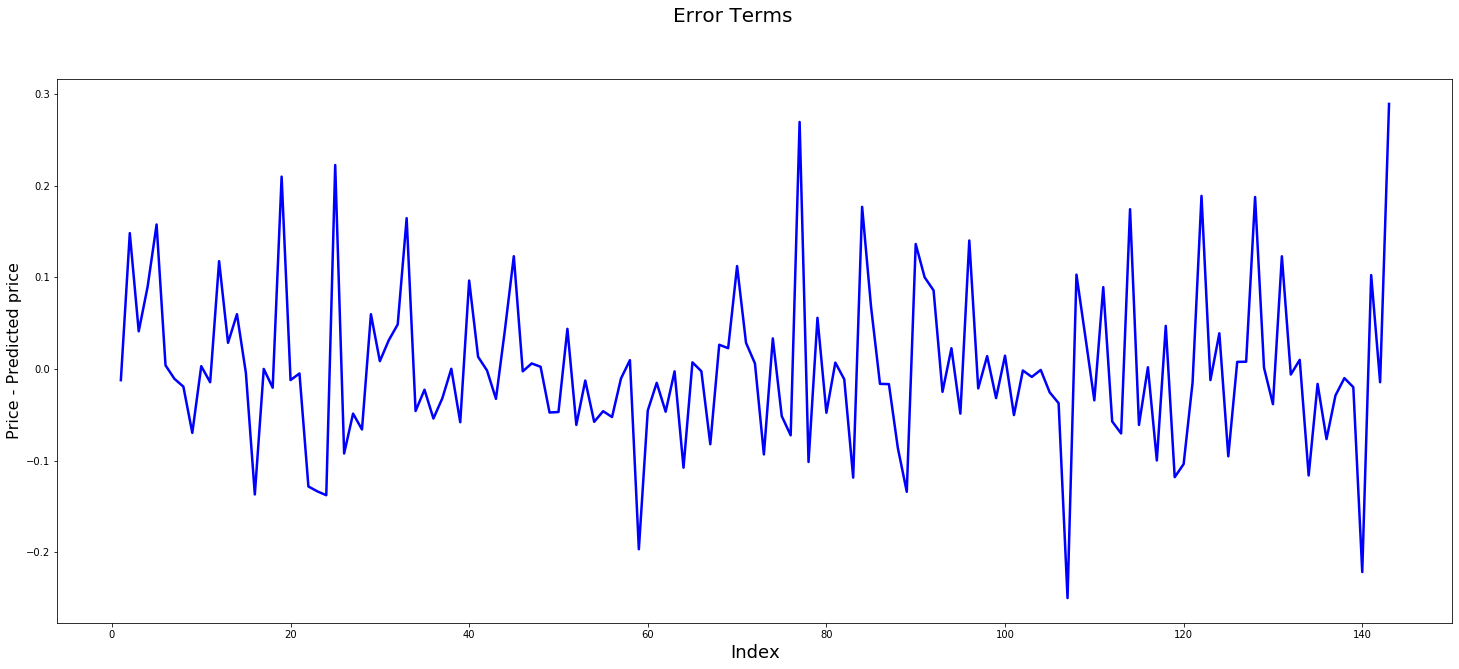

In [497]:
# Let's check the error terms

c = [i for i in range(1,144,1)]
fig = plt.figure(figsize=(25, 10))
plt.plot(c, y_train - y_train_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Price - Predicted price', fontsize=16)

Text(0.5, 0, 'Errors')

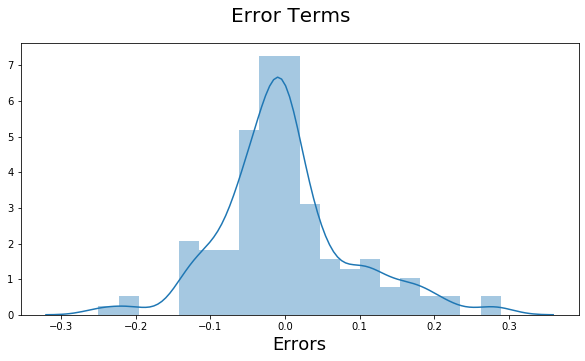

In [498]:
fig = plt.figure(figsize=(10, 5))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)     

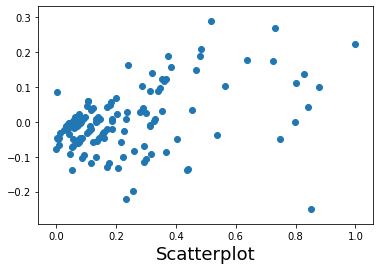

In [499]:
# Let's check the scatter plot of errors
plt.xlabel('Scatterplot', fontsize = 18) 
plt.scatter(y_train, (y_train - y_train_pred))

Text(0, 0.5, 'Price')

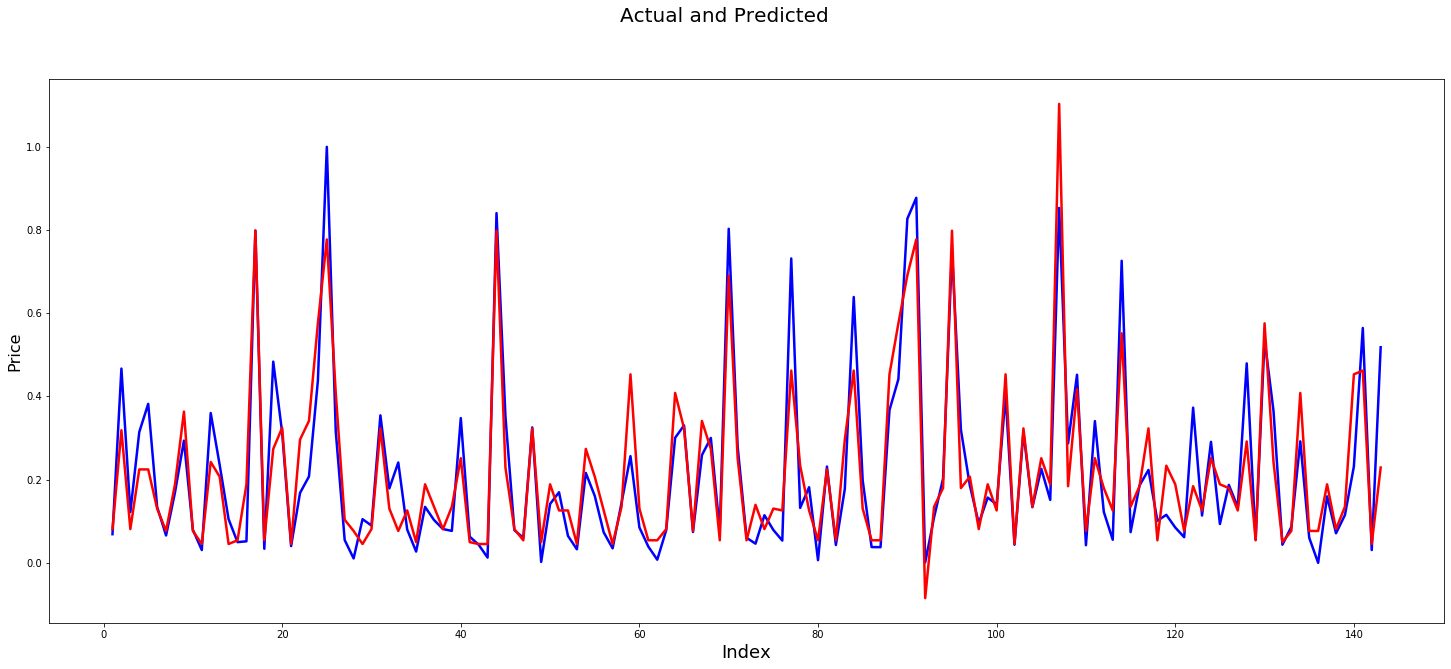

In [500]:
#Actual vs Predicted
c = [i for i in range(1,144,1)]
fig = plt.figure(figsize=(25, 10))
plt.plot(c, y_train, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_train_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)

#### From the above plots, we can see that error terms are random and normally distributed with mean 0. Actual vs Predicted plot also looks okay. So Model #12 seems to be a decent candidate to be the final model.

## 3. Making Predictions Using the Final Model
---

In [501]:
# Predict values using test data
df_test[num_vars] = scaler.transform(df_test[num_vars])
y_test = df_test.pop('price')
X_test = df_test

D:\Programs\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Programs\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [502]:
# Select only the required columns
X_test = X_test[['enginesize', 'bmw', 'rear', 'rotor']]
X_test_sm = sm.add_constant(X_test)
#X_test_sm

D:\Programs\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [503]:
y_test_pred = lm12.predict(X_test_sm)

In [504]:
r_squared_te = r2_score(y_test, y_test_pred)
r_squared_tr = r2_score(y_train, y_train_pred)
print(r_squared_te)
print(r_squared_tr)

0.8549789649521339
0.8331701849554415


R-squared of test and train data is really good and comparable.

### Let's do the Residual Analysis on test data also

Text(0, 0.5, 'y_test-y_test_pred')

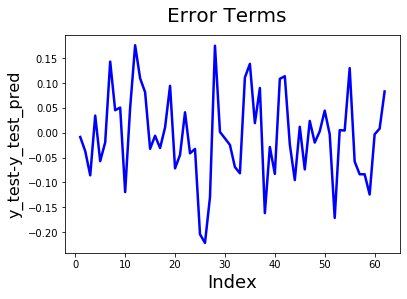

In [505]:
# Let's check the distribution of error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_test_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('y_test-y_test_pred', fontsize=16)    

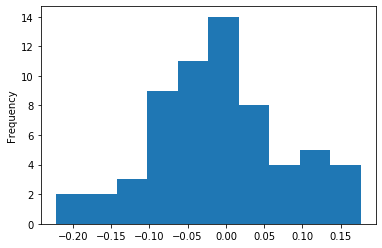

In [506]:
(y_test-y_test_pred).plot.hist()

Text(0, 0.5, 'Price')

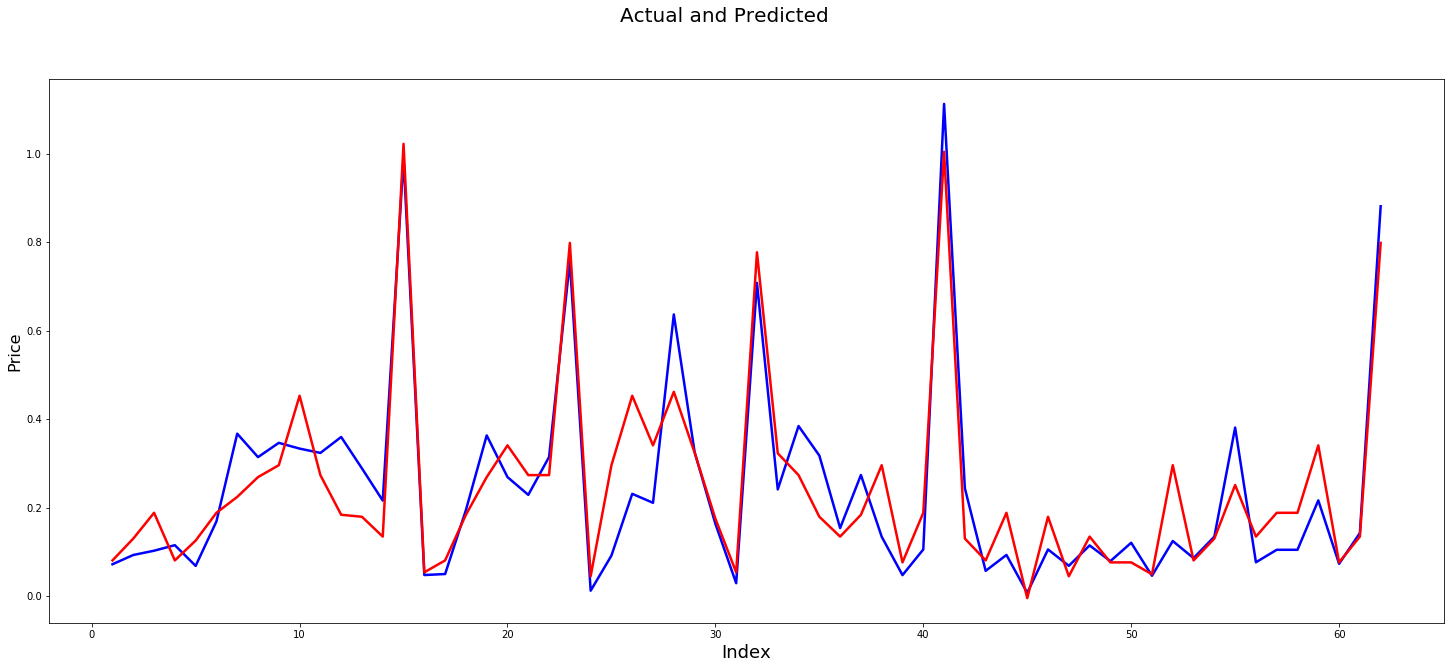

In [507]:
#Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure(figsize=(25, 10))
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)

Text(0.5, 0.98, 'y_train vs y_train_pred')

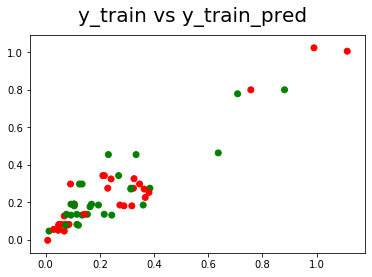

In [508]:
colors = ["r", "g"] * 31
fig = plt.figure() 
plt.scatter(y_test, y_test_pred, color=colors) 
fig.suptitle('y_train vs y_train_pred', fontsize = 20)     


We can see that the equation of our best fitted line is:

$price = 1.1880  \times  enginesize + 0.1988  \times  bmw + 0.2872 \times rear + 0.2516 \times rotor$


# Let's see if we can improve the model by adding new features

### Model #13

We had observed a sudden drop in the r-squared when we removed the column 'carwidth'. Let's readd and check now.

In [509]:
X_trial = X_train_rfe.copy()
X_trial['carwidth'] = X_train['carwidth']
X_trial

,enginesize,bmw,rear,rotor,carwidth
122,0.139623,0,0,0,0.291667
125,0.339623,0,0,0,0.666667
166,0.139623,0,0,0,0.308333
1,0.260377,0,0,0,0.316667
199,0.260377,0,0,0,0.575000
...,...,...,...,...,...
87,0.184906,0,0,0,0.425000
103,0.452830,0,0,0,0.516667
67,0.460377,0,0,0,0.833333
24,0.109434,0,0,0,0.291667


In [510]:
X_trial = sm.add_constant(X_trial)
lm13 = sm.OLS(y_train, X_trial).fit()
lm13.summary()

D:\Programs\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     224.4
Date:                Sun, 31 May 2020   Prob (F-statistic):           3.81e-64
Time:                        22:56:33   Log-Likelihood:                 175.54
No. Observations:                 143   AIC:                            -339.1
Df Residuals:                     137   BIC:                            -321.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1870      0.017    -11.143      0.000      -0.220      -0.154
enginesize     0.7278      0.068     10.673      0.000       0.593       0.863
bmw            0.2447      0.032      7.756      0.000       0.182       0.307
rear           0.4400      0.076      5.814      0.000       0.290       0.590
rotor          0.1664      0.039      4.274      0.000       0.089       0.243
carwidth       0.4606      0.054      8.546      0.000       0.354       0.567
==============================================================================
Omnibus:                        6.554   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                6.121
Skew:                           0.465   Prob(JB):                       0.0469
Kurtosis:                       3.404   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [511]:
X = X_trial.drop('const', axis = 1)
printVIF(X)

     Features   VIF
0  enginesize  9.98
4    carwidth  9.63
3       rotor  1.16
1         bmw  1.13
2        rear  1.08


#### Column 'carwidth' has improved the r-squared.  But it has increased the VIF, let's not include it in the final model.

### RFE has ranked all the columns in the order of ranks. Let's add the columns with next best ranks, maybe from #2 to #10

In [512]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 42),
 ('wheelbase', False, 2),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 12),
 ('curbweight', True, 1),
 ('cylindernumber', False, 20),
 ('enginesize', True, 1),
 ('boreratio', False, 9),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 15),
 ('peakrpm', False, 11),
 ('citympg', False, 10),
 ('highwaympg', False, 26),
 ('audi', False, 28),
 ('bmw', True, 1),
 ('buick', False, 35),
 ('chevrolet', False, 22),
 ('dodge', False, 18),
 ('honda', False, 23),
 ('isuzu', False, 30),
 ('jaguar', False, 24),
 ('mazda', False, 32),
 ('mercury', False, 43),
 ('mitsubishi', False, 13),
 ('nissan', False, 29),
 ('peugeot', True, 1),
 ('plymouth', False, 19),
 ('porsche', False, 3),
 ('renault', False, 25),
 ('saab', False, 8),
 ('subaru', True, 1),
 ('toyota', False, 31),
 ('volkswagen', False, 27),
 ('volvo', False, 40),
 ('two_door', False, 38),
 ('gas', True, 1),
 ('turbo', False, 16),
 ('hardtop', False, 6),
 ('hatchb

Columns with ranks from 2 to 10:
- #2, wheelbase
- #3, porsche
- #4, hatchback
- #5, wagon
- #6, hardtop
- #7, sedan
- #8, saab
- #9, boreratio
- #10, citympg

### Model #14

In [513]:
# Let's add wheelbase and check
X_trial = X_train_rfe.copy()
X_trial['wheelbase'] = X_train['wheelbase']
X_trial = sm.add_constant(X_trial)
lm14 = sm.OLS(y_train, X_trial).fit()
lm14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     164.8
Date:                Sun, 31 May 2020   Prob (F-statistic):           3.96e-56
Time:                        22:56:33   Log-Likelihood:                 156.22
No. Observations:                 143   AIC:                            -300.4
Df Residuals:                     137   BIC:                            -282.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1295      0.016     -7.919      0.000      -0.162      -0.097
enginesize     1.0146      0.060     16.944      0.000       0.896       1.133
bmw            0.1927      0.036      5.413      0.000       0.122       0.263
rear           0.3980      0.087      4.561      0.000       0.225       0.570
rotor          0.2408      0.043      5.579      0.000       0.155       0.326
wheelbase      0.2099      0.043      4.826      0.000       0.124       0.296
==============================================================================
Omnibus:                       14.888   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.122
Skew:                           0.691   Prob(JB):                     0.000191
Kurtosis:                       3.981   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [514]:
X = X_trial.drop('const', axis = 1)
printVIF(X)

     Features   VIF
0  enginesize  5.83
4   wheelbase  5.64
1         bmw  1.10
2        rear  1.10
3       rotor  1.04


#### Column 'wheelbase' has improved the r-squared.  But it has increased the VIF, let's not include it in the final model.

### Model #15

In [515]:
#Let's add - 3, porsche
X_trial = X_train_rfe.copy()
X_trial['porsche'] = X_train['porsche']
X_trial = sm.add_constant(X_trial)
lm15 = sm.OLS(y_train, X_trial).fit()
lm15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     145.3
Date:                Sun, 31 May 2020   Prob (F-statistic):           5.68e-53
Time:                        22:56:33   Log-Likelihood:                 148.60
No. Observations:                 143   AIC:                            -285.2
Df Residuals:                     137   BIC:                            -267.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0820      0.014     -5.754      0.000      -0.110      -0.054
enginesize     1.1656      0.051     22.761      0.000       1.064       1.267
bmw            0.2052      0.038      5.457      0.000       0.131       0.280
rear           0.1274      0.107      1.189      0.236      -0.084       0.339
rotor          0.2497      0.045      5.494      0.000       0.160       0.340
porsche        0.1683      0.063      2.664      0.009       0.043       0.293
==============================================================================
Omnibus:                       18.346   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.956
Skew:                           0.701   Prob(JB):                     2.31e-06
Kurtosis:                       4.546   Cond. No.                         16.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Even though the newly added column improved the r-squared, let's not keep this column in the final model as one of the variables became insignificant.

### Model #16

In [516]:
#Let's add - 4, hatchback
X_trial = X_train_rfe.copy()
X_trial['hatchback'] = X_train['hatchback']
X_trial = sm.add_constant(X_trial)
lm16 = sm.OLS(y_train, X_trial).fit()
lm16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     141.6
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.55e-52
Time:                        22:56:33   Log-Likelihood:                 147.02
No. Observations:                 143   AIC:                            -282.0
Df Residuals:                     137   BIC:                            -264.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0698      0.016     -4.303      0.000      -0.102      -0.038
enginesize     1.1719      0.052     22.664      0.000       1.070       1.274
bmw            0.1904      0.038      4.988      0.000       0.115       0.266
rear           0.2803      0.090      3.120      0.002       0.103       0.458
rotor          0.2700      0.047      5.758      0.000       0.177       0.363
hatchback     -0.0327      0.016     -1.989      0.049      -0.065      -0.000
==============================================================================
Omnibus:                       12.493   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.868
Skew:                           0.507   Prob(JB):                     0.000217
Kurtosis:                       4.342   Cond. No.                         13.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Column 'hatchback' seems to have no significant impact on the model. So let's not include it in the final model

### Model #17

In [517]:
#Let's add - 5, wagon
X_trial = X_train_rfe.copy()
X_trial['wagon'] = X_train['wagon']
X_trial = sm.add_constant(X_trial)
lm17 = sm.OLS(y_train, X_trial).fit()
lm17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     137.2
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.50e-51
Time:                        22:56:33   Log-Likelihood:                 145.17
No. Observations:                 143   AIC:                            -278.3
Df Residuals:                     137   BIC:                            -260.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0870      0.015     -5.788      0.000      -0.117      -0.057
enginesize     1.1892      0.052     22.967      0.000       1.087       1.292
bmw            0.2004      0.039      5.200      0.000       0.124       0.277
rear           0.2888      0.091      3.174      0.002       0.109       0.469
rotor          0.2537      0.047      5.432      0.000       0.161       0.346
wagon          0.0129      0.022      0.581      0.562      -0.031       0.057
==============================================================================
Omnibus:                       13.828   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.229
Skew:                           0.570   Prob(JB):                     0.000110
Kurtosis:                       4.327   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Column 'wagon' seems to have no significant impact on the model. So let's not include it in the final model.

### Model #18

In [518]:
#Let's add - 6, hardtop
X_trial = X_train_rfe.copy()
X_trial['hardtop'] = X_train['hardtop']
X_trial = sm.add_constant(X_trial)
lm18 = sm.OLS(y_train, X_trial).fit()
lm18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     137.9
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.14e-51
Time:                        22:56:33   Log-Likelihood:                 145.45
No. Observations:                 143   AIC:                            -278.9
Df Residuals:                     137   BIC:                            -261.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0838      0.015     -5.752      0.000      -0.113      -0.055
enginesize     1.1877      0.052     23.001      0.000       1.086       1.290
bmw            0.1979      0.038      5.158      0.000       0.122       0.274
rear           0.3465      0.110      3.139      0.002       0.128       0.565
rotor          0.2506      0.046      5.391      0.000       0.159       0.342
hardtop       -0.0601      0.064     -0.943      0.347      -0.186       0.066
==============================================================================
Omnibus:                       13.656   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.517
Skew:                           0.577   Prob(JB):                     0.000157
Kurtosis:                       4.269   Cond. No.                         16.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model #19

In [519]:
#Let's add - 7, sedan
X_trial = X_train_rfe.copy()
X_trial['sedan'] = X_train['sedan']
X_trial = sm.add_constant(X_trial)
lm19 = sm.OLS(y_train, X_trial).fit()
lm19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     138.4
Date:                Sun, 31 May 2020   Prob (F-statistic):           9.46e-52
Time:                        22:56:33   Log-Likelihood:                 145.65
No. Observations:                 143   AIC:                            -279.3
Df Residuals:                     137   BIC:                            -261.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0912      0.016     -5.854      0.000      -0.122      -0.060
enginesize     1.1799      0.052     22.664      0.000       1.077       1.283
bmw            0.1908      0.039      4.896      0.000       0.114       0.268
rear           0.2977      0.091      3.268      0.001       0.118       0.478
rotor          0.2583      0.047      5.521      0.000       0.166       0.351
sedan          0.0178      0.016      1.129      0.261      -0.013       0.049
==============================================================================
Omnibus:                       12.409   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               15.527
Skew:                           0.540   Prob(JB):                     0.000425
Kurtosis:                       4.201   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Column 'sedan' seems to have no significant impact on the model. So let's not include it in the final model.

### Model #20

In [520]:
#Let's add - 8, saab
X_trial = X_train_rfe.copy()
X_trial['saab'] = X_train['saab']
X_trial = sm.add_constant(X_trial)
lm20 = sm.OLS(y_train, X_trial).fit()
lm20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     141.3
Date:                Sun, 31 May 2020   Prob (F-statistic):           2.81e-52
Time:                        22:56:33   Log-Likelihood:                 146.92
No. Observations:                 143   AIC:                            -281.8
Df Residuals:                     137   BIC:                            -264.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0874      0.014     -6.048      0.000      -0.116      -0.059
enginesize     1.1892      0.051     23.267      0.000       1.088       1.290
bmw            0.2009      0.038      5.288      0.000       0.126       0.276
rear           0.2892      0.090      3.219      0.002       0.112       0.467
rotor          0.2541      0.046      5.522      0.000       0.163       0.345
saab           0.1001      0.052      1.938      0.055      -0.002       0.202
==============================================================================
Omnibus:                       14.434   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.628
Skew:                           0.578   Prob(JB):                     5.47e-05
Kurtosis:                       4.399   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Column 'saab' seems to have no significant impact on the model. So let's not include it in the final model.

### Model #21

In [521]:
#Let's add - 9, boreratio
X_trial = X_train_rfe.copy()
X_trial['boreratio'] = X_train['boreratio']
X_trial = sm.add_constant(X_trial)
lm21 = sm.OLS(y_train, X_trial).fit()
lm21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     138.2
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.02e-51
Time:                        22:56:33   Log-Likelihood:                 145.57
No. Observations:                 143   AIC:                            -279.1
Df Residuals:                     137   BIC:                            -261.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0991      0.020     -4.996      0.000      -0.138      -0.060
enginesize     1.1525      0.062     18.734      0.000       1.031       1.274
bmw            0.1994      0.038      5.203      0.000       0.124       0.275
rear           0.2803      0.091      3.082      0.002       0.100       0.460
rotor          0.2434      0.047      5.174      0.000       0.150       0.336
boreratio      0.0465      0.044      1.060      0.291      -0.040       0.133
==============================================================================
Omnibus:                       13.019   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.093
Skew:                           0.570   Prob(JB):                     0.000320
Kurtosis:                       4.183   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Column 'boreratio' seems to have no significant impact on the model. So let's not include it in the final model.

### Model #22

In [522]:
#Let's add - 10, citympg
X_trial = X_train_rfe.copy()
X_trial['citympg'] = X_train['citympg']
X_trial = sm.add_constant(X_trial)
lm22 = sm.OLS(y_train, X_trial).fit()
lm22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     142.4
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.86e-52
Time:                        22:56:33   Log-Likelihood:                 147.36
No. Observations:                 143   AIC:                            -282.7
Df Residuals:                     137   BIC:                            -264.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0151      0.035     -0.425      0.672      -0.085       0.055
enginesize     1.0836      0.070     15.388      0.000       0.944       1.223
bmw            0.1938      0.038      5.109      0.000       0.119       0.269
rear           0.2837      0.090      3.167      0.002       0.107       0.461
rotor          0.1993      0.052      3.840      0.000       0.097       0.302
citympg       -0.1245      0.058     -2.148      0.033      -0.239      -0.010
==============================================================================
Omnibus:                       12.352   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.946
Skew:                           0.554   Prob(JB):                     0.000568
Kurtosis:                       4.131   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Column 'citympg' seems to have no significant impact on the model. So let's not include it in the final model.

### Let's create a new column, power-to-curbweight ratio and add it to the model.

### Model #23

In [523]:
X_trial = X_train_rfe.copy()
X_trial['power_to_curbweight'] = X_train['horsepower'] / X_train['curbweight']

In [524]:
X_trial['power_to_curbweight'].describe()
X_trial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 5 columns):
enginesize             143 non-null float64
bmw                    143 non-null uint8
rear                   143 non-null uint8
rotor                  143 non-null uint8
power_to_curbweight    142 non-null float64
dtypes: float64(2), uint8(3)
memory usage: 3.8 KB


In [525]:
X_trial[X_trial['power_to_curbweight'].isnull()]

,enginesize,bmw,rear,rotor,power_to_curbweight
18,0.0,0,0,0,NaN


In [526]:
print(X_train.loc[18, 'horsepower'])
print(X_train.loc[18, 'curbweight'])

0.0
0.0


In [527]:
# Let's impute the NaN in X_trial with zero. Because both horsepower and curbweight are zero for the 18th row
X_trial.loc[np.isnan(X_trial['power_to_curbweight']), 'power_to_curbweight'] = 0.0

In [528]:
X_trial[X_trial['power_to_curbweight'].isnull()]
X_trial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 5 columns):
enginesize             143 non-null float64
bmw                    143 non-null uint8
rear                   143 non-null uint8
rotor                  143 non-null uint8
power_to_curbweight    143 non-null float64
dtypes: float64(2), uint8(3)
memory usage: 3.8 KB


In [529]:
X_trial = sm.add_constant(X_trial)
lm23 = sm.OLS(y_train, X_trial).fit()
lm23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     137.1
Date:                Sun, 31 May 2020   Prob (F-statistic):           1.58e-51
Time:                        22:56:34   Log-Likelihood:                 145.11
No. Observations:                 143   AIC:                            -278.2
Df Residuals:                     137   BIC:                            -260.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0764      0.023     -3.395      0.001      -0.121      -0.032
enginesize              1.1964      0.055     21.940      0.000       1.089       1.304
bmw                     0.1997      0.039      5.187      0.000       0.124       0.276
rear                    0.3014      0.095      3.157      0.002       0.113       0.490
rotor                   0.2569      0.048      5.371      0.000       0.162       0.351
power_to_curbweight    -0.0199      0.041     -0.489      0.625      -0.100       0.060
==============================================================================
Omnibus:                       13.700   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.415
Skew:                           0.583   Prob(JB):                     0.000165
Kurtosis:                       4.251   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Column 'power_to_curbweight' seems to have no significant impact on the model. So let's not include it in the final model.

## Conclusion

Based on the analysis, model #12 is the best model.

$price = 1.1880  \times  enginesize + 0.1988  \times  bmw + 0.2872 \times rear + 0.2516 \times rotor$

The price of the cars majorly depend on the engine size, brand value or features of BMW cars and the engine type 'rotor'.